In [4]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 5.4 MB 31.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [1]:
# Loading the required packages:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


In [2]:
df = pd.read_csv('winequality-red.csv', sep = ';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


In [3]:
df

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

In [5]:
print(df.columns)
print(df.describe())


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
       fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]


In [6]:
x = df.drop(columns='quality')
print('The input label for our decision tree classification is \n',x.head())
y = df['quality']
print('The output label for the decision tree classification is \n',y.head())


The input label for our decision tree classification is 
    fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.4              0.70         0.00  ...  3.51       0.56      9.4
1            7.8              0.88         0.00  ...  3.20       0.68      9.8
2            7.8              0.76         0.04  ...  3.26       0.65      9.8
3           11.2              0.28         0.56  ...  3.16       0.58      9.8
4            7.4              0.70         0.00  ...  3.51       0.56      9.4

[5 rows x 11 columns]
The output label for the decision tree classification is 
 0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=43)


In [8]:
# let's first visualize the tree without preprocessing
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
feature_name = list(x.columns)
print('The feature name are\n', feature_name)
class_name = list(y_train.unique())
print('The class name are \n', class_name)


The feature name are
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
The class name are 
 [5, 7, 6, 8, 4, 3]


In [11]:
# create a dot file which store the tree structure
dot_data = export_graphviz(dtc, feature_names = feature_name, rounded= True, filled= True)
# draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('myTreeBeforPreprocessing.png')
# Show graph
image = Image(graph.create_png())

In [13]:
dtc.score(x_train, y_train)

1.0

In [14]:
dt_pred = dtc.predict(x_test)

In [15]:
dt_pred

array([5, 4, 6, 5, 6, 5, 5, 5, 6, 5, 5, 4, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5,
       7, 7, 6, 6, 5, 7, 6, 7, 7, 7, 5, 6, 5, 5, 7, 8, 6, 7, 5, 6, 6, 6,
       4, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 4, 7, 6, 5, 6, 6, 5, 5, 5, 7,
       6, 5, 7, 5, 6, 6, 6, 7, 7, 6, 6, 7, 5, 7, 5, 5, 5, 6, 7, 6, 6, 5,
       5, 6, 7, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 7, 5, 7, 6,
       6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 7, 6, 7, 5, 6, 7, 5, 5, 5, 6, 7, 6,
       5, 6, 5, 6, 5, 5, 7, 6, 6, 7, 4, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6,
       5, 7, 6, 5, 7, 6, 5, 5, 4, 5, 5, 7, 7, 4, 5, 5, 7, 8, 6, 5, 5, 5,
       7, 5, 5, 6, 6, 6, 7, 5, 7, 7, 5, 5, 4, 6, 6, 5, 4, 5, 7, 5, 5, 6,
       6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 3, 6, 7, 5, 5, 6, 5, 7, 6, 5, 5, 7,
       5, 7, 5, 6, 5, 5, 5, 7, 5, 6, 5, 5, 7, 5, 5, 7, 4, 6, 5, 5, 5, 7,
       5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 7, 6, 5, 6, 5, 5, 6, 6, 7,
       6, 5, 6, 7, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 7, 5, 7, 5,
       6, 6, 6, 4, 7, 6, 6, 6, 6, 5, 5, 7, 4, 6, 6,

In [16]:
dtc.score(x_test,y_test)

0.5958333333333333

In [17]:
"""We have not done any preprocess lets do it and see what happen """

scalar = StandardScaler()

In [19]:
# transforming my entire input data
x_transform = scalar.fit_transform(x)
x_transform

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = 0.30, random_state=43)

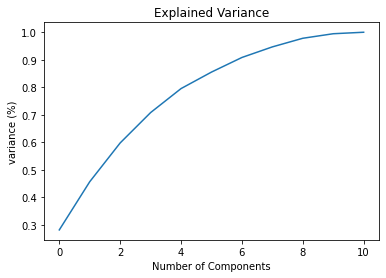

In [21]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained Variance')
plt.show()

In [22]:
# From the above graph we can see that 95% of our data is comming from 8 column only.
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(new_data, columns=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8'])
print(principal_x)

          PC-1      PC-2      PC-3  ...      PC-6      PC-7      PC-8
0    -1.619530  0.450950 -1.774454  ... -0.913921 -0.161043 -0.282258
1    -0.799170  1.856553 -0.911690  ...  0.929714 -1.009829  0.762587
2    -0.748479  0.882039 -1.171394  ...  0.401473 -0.539553  0.597946
3     2.357673 -0.269976  0.243489  ... -0.131017  0.344290 -0.455375
4    -1.619530  0.450950 -1.774454  ... -0.913921 -0.161043 -0.282258
...        ...       ...       ...  ...       ...       ...       ...
1594 -2.150500  0.814286  0.617063  ...  0.054835  0.170812 -0.355866
1595 -2.214496  0.893101  1.807402  ... -0.674711 -0.607970 -0.247640
1596 -1.456129  0.311746  1.124239  ... -0.506410 -0.231082  0.079382
1597 -2.270518  0.979791  0.627965  ... -0.860408 -0.321487 -0.468876
1598 -0.426975 -0.536690  1.628955  ... -0.496154  1.189132  0.042176

[1599 rows x 8 columns]


In [23]:
# let's see how our model preform on this data
x_train,x_test, y_train, y_test = train_test_split(principal_x, y , test_size = 0.30, random_state = 43)

In [25]:
processedDT = DecisionTreeClassifier()
processedDT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
processedDT.score(x_test, y_test)

0.5854166666666667

In [27]:
# GrideSearchCV is used to tune the hyperparameter
grid_parm = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'splitter' : ['best', 'random']
}

In [28]:
grid_search = GridSearchCV(estimator = processedDT, param_grid = grid_parm, cv = 5, n_jobs=-1)

In [29]:
grid_search.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 32), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [31]:
grid_search.best_score_

0.5996425379803396

In [35]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 23, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=23,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
dt.score(x_test, y_test)

0.5666666666666667

In [38]:
# create a dot file which store the tree structure
feature_name  = list(x.columns)
class_name  =list(y_train.unique())
dot_data = export_graphviz(dt, rounded= True, filled= True)
# draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_png('myTreeBeforPreprocessing.png')
# Show graph
image = Image(graph.create_png())
image